In [49]:
import pandas as pd 
import geopandas as gpd 
from shapely.geometry import Point
import numpy as np 
import jellyfish

In [50]:
# Load Communes GeoJSON Features 
communes_json_gdf = gpd.read_file('communes_58.geojson')
communes_json_gdf.tail()

code_48  code_58  code_5          nom      nom_maj       nom_ar  \
1536     3924     5707   39024       Tendla       TENDLA        تندلة   
1537     3922     5708   39022      M'Rara.      M'RARA.        مرارة   
1538     4702     5801   47002    El Meniaâ    EL MENIAÂ      المنيعة   
1539     4712     5802   47012   Hassi Gara   HASSI GARA  حاسي القارة   
1540     4711     5803   47011  Hassi Fehal  HASSI FEHAL   حاسي الفحل   

      code_wil                                           geometry  
1536        57  MULTIPOLYGON (((5.39159 33.82386, 5.60398 33.7...  
1537        57  MULTIPOLYGON (((5.27165 33.74179, 5.27204 33.7...  
1538        58  MULTIPOLYGON (((2.05990 31.65914, 2.07683 31.6...  
1539        58  MULTIPOLYGON (((4.03471 30.60033, 4.03410 30.5...  
1540        58  MULTIPOLYGON (((2.36121 32.26114, 2.50097 32.2...

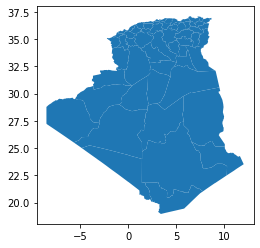

In [51]:
# Group 
subset_gdf = communes_json_gdf [['code_wil', 'nom', 'nom_maj', 'nom_ar', 'geometry']]
wilayas_58_gdf = subset_gdf.dissolve(by='code_wil', as_index=False)
wilayas_58_gdf.plot()

In [52]:
wilayas_58_gdf.tail()

code_wil                                           geometry         nom  \
53        54  POLYGON ((6.50216 21.54620, 6.50748 21.54929, ...  In Guezzam   
54        55  POLYGON ((6.49204 33.21381, 6.49436 33.20691, ...   Touggourt   
55        56  POLYGON ((9.05073 25.14706, 10.03635 25.15342,...      Djanet   
56        57  POLYGON ((6.06736 33.53221, 6.06781 33.53138, ...  El Megaier   
57        58  POLYGON ((4.03471 30.60033, 4.03410 30.59847, ...   El Meniaâ   

       nom_maj   nom_ar  
53  IN GUEZZAM  إن قزام  
54   TOUGGOURT    توقرت  
55      DJANET     جانت  
56  EL MEGAIER   المغير  
57   EL MENIAÂ  المنيعة

In [53]:
# Write to GeoJSON files
wilayas_58_gdf.index = np.arange(1, len(wilayas_58_gdf) + 1)
wilayas_58_gdf.rename(columns={"code_wil": "code"}, inplace=True)
wilayas_58_gdf.to_file("wilayas_58.geojson", driver='GeoJSON')

In [54]:
# Write to CSV files
wilayas_58_df = pd.DataFrame(wilayas_58_gdf[['code', 'nom', 'nom_maj', 'nom_ar']])
wilayas_58_df.to_csv("wilayas_58.csv")

KeyError: "['code_wil'] not in index"